In [1]:
import numpy as np
from math import *
from matplotlib import cm
from matplotlib import pyplot as plt
import time
%matplotlib inline

In [2]:
Nx = 8
Ny = 8

Lx = 2*pi
Ly = 2*pi

dx = Lx/(Nx)
dy = Ly/(Ny)


mu=1/(2*pi)
U=1.0

# Staggered Grid

x_start,x_end = 0.0,Lx
y_start,y_end = 0.0,Ly

y = np.linspace(y_start,y_end,Ny+1)
x = np.linspace(x_start,x_end,Nx+1)

# Pressure
xp=np.zeros((Nx+2,1),dtype=float)
yp=np.zeros((Ny+2,1),dtype=float)
p= np.zeros((Nx+2,Ny+2),dtype=float)

#U velocity
xu=np.zeros((Nx+1,1),dtype=float)
yu=np.zeros((Ny+2,1),dtype=float)
u = np.zeros((Nx+1,Ny+2),dtype=float)
ut = np.zeros((Nx+1,Ny+2),dtype=float)

#v velocity
xv=np.zeros((Nx+2,1),dtype=float)
yv=np.zeros((Ny+1,1),dtype=float)
v = np.zeros((Nx+2,Ny+1),dtype=float)
vt = np.zeros((Nx+2,Ny+1),dtype=float)

In [3]:
# Pressure points
for i in range(1,Nx):
    for j in range(1,Ny):
        xp[i]=(x[i-1]+x[i])/2
        yp[j]=(y[j-1]+y[j])/2

xp[0]=xp[1]-dx
yp[0]=yp[1]-dy

xp[-1]=xp[-2]+dx
yp[-1]=yp[-2]+dy

# u-velocity points
for i in range(Nx):
    for j in range(1,Ny):
        xu[i]=x[i]
        yu[j]=(y[j-1]+y[j])/2

xu[0]=xu[1]-dx
yu[0]=yu[1]-dy

xu[-1]=xu[-2]+dx
yu[-1]=yu[-2]+dy

# v-velocity points
for i in range(1,Nx):
    for j in range(Ny):
        yv[j]=y[j]
        xv[i]=(x[i-1]+x[i])/2;

xv[0]=xv[1]-dx;
yv[0]=yv[1]-dy;

xv[-1]=xv[-2]+dx;
yv[-1]=yv[-2]+dy;

[X,Y]=np.meshgrid(x,y)
#plt.plot(xu,yu)

In [4]:
for i in range(0,Nx+1):
    for j in range(0,Ny+2):
        u[i,j] = -np.cos(xu[i])*np.sin(yu[j])

for i in range(0,Nx+2):
    for j in range(0,Ny+1):
        v[i,j] =  np.sin(xv[i])*np.cos(yv[j])
        
for i in range(0,Nx+2):
    for j in range(0,Ny+2):
        p[i,j]=-0.25*(np.cos(2*xp[i])+np.cos(2*yp[j]))
        


#v=va

In [5]:
def F1c(ue,uw,us,un,vs,vn,dx,dy):
    F1c=-((ue**2)-(uw**2))/dx - ((un*vn)-(us*vs))/dy
    return F1c

In [6]:
def Fv(uP,uE,uW,uN,uS,dx,dy,mu):
    Fv=(mu/dx)*(((uE-uP)/dx)-((uP-uW)/dx)) + (mu/dy)*(((uN-uP)/dy)-((uP-uS)/dy))
    return Fv 

In [7]:
def F2c(vn,vs,ve,vw,ue,uw,dx,dy):
    F2c= -((ue*ve)-(uw*vw))/dx - ((vn**2)-(vs**2))/dy
    return F2c

In [8]:
#Simulation parameters
[X,Y]=np.meshgrid(x,y)

t=0
tmax=50

#dt=0.05*(min(dx,dy))**2/Re
dt = dx*0.05
nt = int((tmax-t)/dt)

maxit = 1500

tstep = 0

#simlations

while(tstep<nt):
    
    #predictor
               
    ue1=(u[1:-1,1:-1]+u[2:,1:-1])/2
    uw1=(u[1:-1,1:-1]+u[:-2,1:-1])/2
    un1=(u[1:-1,1:-1]+u[1:-1,2:])/2
    us1=(u[1:-1,1:-1]+u[1:-1,:-2])/2
    vn1=(v[1:-2,1:]+v[2:-1,1:])/2
    vs1=(v[1:-2,:-1]+v[2:-1,:-1])/2
    
    
    
    uP = (u[1:-1,1:-1])
    uE = (u[2:,1:-1])
    uW = (u[:-2,1:-1])
    uN = (u[1:-1,2:])
    uS = (u[1:-1,:-2])
    
    
    if tstep==0:
        G1=(F1c(ue1,uw1,us1,un1,vs1,vn1,dx,dy))+Fv(uP,uE,uW,uN,uS,dx,dy,mu)
        ut[1:-1,1:-1]=u[1:-1,1:-1]+(dt/1)*G1
        G1_old=G1.copy()
        
               
    else:
        
        G1=(F1c(ue1,uw1,us1,un1,vs1,vn1,dx,dy))+Fv(uP,uE,uW,uN,uS,dx,dy,mu)
        ut[1:-1,1:-1]=u[1:-1,1:-1]+(dt/2)*(3*G1-G1_old)
        G1_old=G1.copy()

    ve12=(v[1:-1,1:-1]+v[2:,1:-1])/2
    vw12=(v[1:-1,1:-1]+v[:-2,1:-1])/2
    vn12=(v[1:-1,1:-1]+v[1:-1,2:])/2
    vs12=(v[1:-1,1:-1]+v[1:-1,:-2])/2
    ue12=(u[1:,1:-2]+u[1:,2:-1])/2
    uw12=(u[:-1,1:-2]+u[:-1,2:-1])/2
    
    vP = (v[1:-1,1:-1])
    vE = (v[2:,1:-1])
    vW = (v[:-2,1:-1])
    vN = (v[1:-1,2:])
    vS = (v[1:-1,:-2])
    
    
    if tstep==0:
        G2=(F2c(vn12,vs12,ve12,vw12,ue12,uw12,dx,dy)) + Fv(vP,vE,vW,vN,vS,dx,dy,mu)
        vt[1:-1,1:-1]=v[1:-1,1:-1]+(dt/1)*G2
        G2_old=G2.copy()
            
    else:
        
        G2=(F2c(vn12,vs12,ve12,vw12,ue12,uw12,dx,dy))+ Fv(vP,vE,vW,vN,vS,dx,dy,mu)
        vt[1:-1,1:-1]=v[1:-1,1:-1]+(dt/2)*(3*G2-G2_old)
        G2_old=G2.copy()

        
    #Boundary conditions
    ut[:,0]=ut[:,-2] #Bottom boundary condition
    ut[:,-1]=ut[:,1] #Top Boundary condition
    
    vt[0,:]=vt[-2,:] #Left Boundary condition
    vt[-1:]=vt[1,:] #Right Boundary condition

    ut[0,:] = ut[-2,:]
    ut[-1,:] = ut[1,:]
    vt[:,0] = vt[:,-2]
    vt[:,-1] = vt[:,1]
    
    #Poissions equation
    
   
    
    
    #p[:,0]=p[:,1]
    #p[:,-1]=p[:,-2]
    #p[0,:]=p[1,:]
    #p[-1,:]=p[-2,:]
    
    p_counter = 0
    while (p_counter<maxit):
    
        p_old = p.copy()
        
        
        p[1:Nx+1,1:Ny+1]=0.25*((p_old[1:Nx+1,2:Ny+2]+p_old[1:Nx+1,:Ny]+\
                        p_old[2:Nx+2,1:Ny+1]+p_old[:Nx,1:Ny+1])-(dy/dt)*(vt[1:Nx+1,1:Ny+1]-\
                        vt[1:Nx+1,:Ny])-(dx/dt)*(ut[1:Nx+1,1:Ny+1]-ut[:Nx,1:Ny+1]))
        
        #Boundary conditions
        p[:,0]=p[:,1]
        p[:,-1]=p[:,-2]
        p[0,:]=p[1,:]
        p[-1,:]=p[-2,:]
    
        p_counter = p_counter + 1
    
        rms_error = sqrt(sum(sum((p-p_old)**2))/np.size(p))
        if (rms_error<10**-6 and rms_error !=0):
            break
        # Corrector step
    
    u[1:-1,1:-1]=ut[1:-1,1:-1]-(dt/(dx))*(p[2:-1,1:-1]-p[1:-2,1:-1])
    v[1:-1,1:-1]=vt[1:-1,1:-1]-(dt/(dy))*(p[1:-1,2:-1]-p[1:-1,1:-2])

    #Boundary conditions for correct velocities
    
     #Boundary conditions
    u[:,0]=u[:,-2] #Bottom boundary condition
    u[:,-1]=u[:,1] #Top Boundary condition
    
    v[0,:]=v[-2,:] #Left Boundary condition
    v[-1:]=v[1,:] #Right Boundary condition

    u[0,:] = u[-2,:]
    u[-1,:] = u[1,:]
    v[:,0] = v[:,-2]
    v[:,-1] = v[:,1]
    
    #End time loop
    tstep+=1

In [9]:
uu=(u[:,:-1]+u[:,1:])*0.5
vv=(v[:-1,:]+v[1:,:])*0.5

uu=uu.T
vv=vv.T

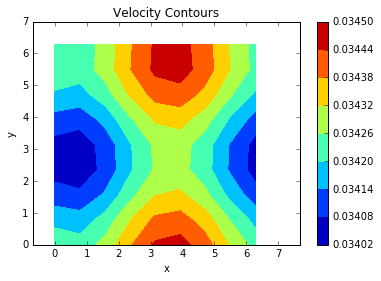

In [13]:
plt.figure()#(figsize=(size, (1.-0)/(1.-0)*size))
plt.contourf(X,Y,np.sqrt(uu**2+vv**2))
plt.colorbar()
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Velocity Contours')
plt.show()